## K-nearest neighbors - a lazy learning algorithm

KNN is a typical example of **lazy learner**. It is called "lazy" not beacause of its apparent simplicity, but because it dosen't learn a discriminative function form the training data but memorizes the training dataset instead.

## Parametric versus non parametric models

Machine learning algorithms can be grouped into **parametric** and **nonparametric** models. Using parametric models, we can estimate parameters from the training dataset  to learn a function that can classify new data points without requiring the original training dataset anymore. Examples of parametric models are the perceptron, logistic regression, and the linear SVM.

KNN belongs to a subcategory of non parametric models that is described by **instance-based learning**. Models based on instance-based learning are characterized by memorizing the training dataset.

The KNN algorithm can be summarized by the following steps:
1. Choose the number of $k$ and a distance metric.
1. Find the k-nearest neighbors of the data record that we want to classify.
1. Assign the class label by majority vote.

<p align="center">
  <img src="../markdown-images/k-nearest.png" width="600">
</p>
<br/>

Based on the choosen distance metric, the KNN algorithm finds the $k$ examples in the training dataset that are closet to the point that we want to classify. The class label fo the data point is determined by a majority vote among its k-nearest neighbours.

The main advantage of such memory-based approach is that the classifier immediately adapts as we collect new training data. However, the downside is that the computational complexity for classifying a new exampels linearly grows with he number of training dataset in the worst-case scenario.

Furthermore, we can't discard training examples since no training step is involved, thus the storage space can become a challenge.

The right choice of $k$ is crucial to finding a good balance between overfitting and underfitting. We also have to make sure that we choose a distance metric that is appropriate for the features of dataset. Often a simple Euclidean distance measure is used for real-value examples. If we are using Euclidean distance measure, it is also important to standardize the data so that each feature contributes equally to the distance. 

The *minkowski* distance is just a generalization of the Euclidean and Manhatten distance, which can be written as follows: <br/>

$d(x^{(i)}, x^{(j)}) = \sqrt[p]{\sum_{k}|x_{k}^{(i)} - x_{k}^ {(j)}| ^ p}$ <br/>

It becomes the Eculidean distance if we set the parameter $p=2$ and manhattan distance at $p=1$.


In [4]:
import pandas as pd
import numpy as np
import os

filepath = os.path.join('../data', 'iris.data')
df = pd.read_csv(filepath, header=None, encoding='utf-8') 

In [5]:
## Select the first 100 data
labels = df.iloc[0:100, 4].values
labels = np.where(labels == 'Iris-setosa', -1, 1)

In [6]:
features = df.iloc[0:100, [0,2]].values
features

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, train_size = .75)

X_std = np.copy(X_train)
# X_train[:,0].mean()
# X_train[:, 0].std()
X_std[:, 0] = (X_train[:, 0] - X_train[:, 0].mean() ) / X_train[:, 0].std()
X_std[:, 1] = (X_train[:, 1] - X_train[:, 1].mean() ) / X_train[:, 1].std()

<AxesSubplot:>

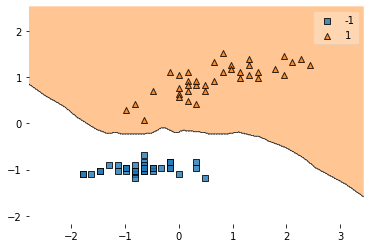

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_std, y_train)

# Plotting decision regions
plot_decision_regions(X_std, y_train, clf=knn)
